In [1]:
cd "C:\Users\jan.santora\Dearman Engine Company Ltd\Core Systems - Documents\SimulationAndAnalysis\Test\ETR\ETR-271-PistonSealDevelopment-BeddingIn+SealAlloc_PVX\"

C:\Users\jan.santora\Dearman Engine Company Ltd\Core Systems - Documents\SimulationAndAnalysis\Test\ETR\ETR-271-PistonSealDevelopment-BeddingIn+SealAlloc_PVX


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from matplotlib.pyplot import figure

from bokeh.io import show, output_file
from bokeh.plotting import figure
from bokeh.models import CustomJS
#figure(num=None, figsize=(18, 16), dpi=80, facecolor='w', edgecolor='k')
%matplotlib inline

In [3]:
df = pd.read_excel('ETR0271_Data.xlsx','Sheet1')

In [4]:
df.columns

Index(['Part', 'Date ', 'Test run', 'Pressure', 'Engine Speed', 'Run Time',
       'Run time (hrs)', 'Scavenge Volume', 'Scavenge Rate',
       'Dyno Power avrg'],
      dtype='object')

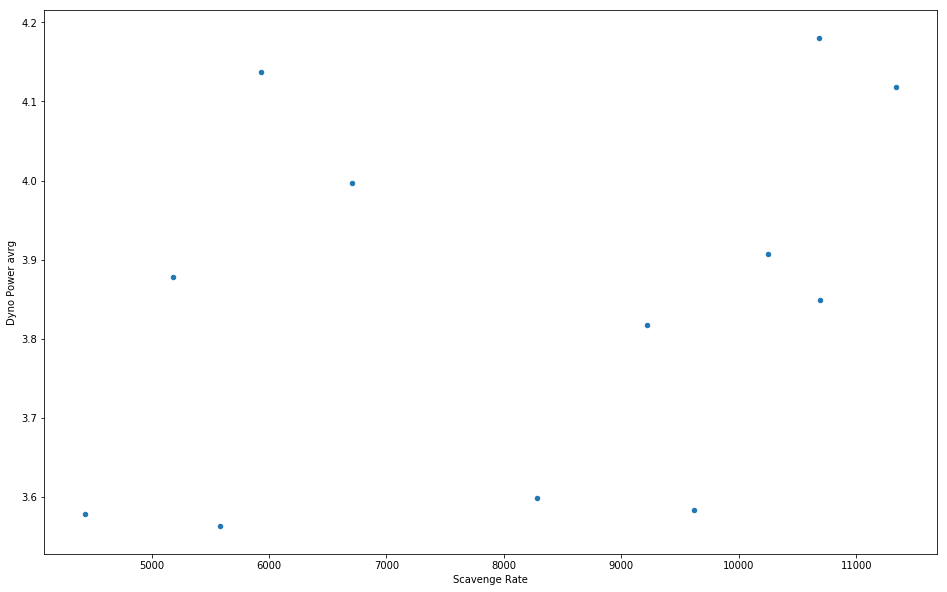

In [5]:
df.plot.scatter(x = 'Scavenge Rate', y ='Dyno Power avrg', figsize = (16,10))

In [6]:
slow_rpm=df[df['Engine Speed'] == 800]
med_rpm=df[df['Engine Speed'] == 900]
fast_rpm = df[df['Engine Speed'] == 1000]

slow_rpm.head()

,Part,Date,Test run,Pressure,Engine Speed,Run Time,Run time (hrs),Scavenge Volume,Scavenge Rate,Dyno Power avrg
0,Part 3,2018-08-01,2661.0,37.5,800,14.0,0.233333,NaN,NaN,3.583333
1,NaN,2018-08-01,2662.0,30.0,800,6.0,0.100000,NaN,NaN,2.681667
2,NaN,2018-08-01,2663.0,45.0,800,8.0,0.133333,NaN,NaN,4.496667
3,NaN,2018-08-01,2664.0,37.5,800,4.0,0.066667,5130.0,9618.75,3.583333
12,Part 4,2018-08-06,2678.0,37.5,800,10.5,0.175000,NaN,NaN,3.591667


In [7]:
output_file("Scavenge Rate.html")


p=figure(plot_height=1000,plot_width=1500)
p.circle(x =slow_rpm['Scavenge Rate'], y=slow_rpm['Dyno Power avrg'], size=10, color="navy", alpha = 0.5, legend="800 RPM")
p.circle(x =med_rpm['Scavenge Rate'], y=med_rpm['Dyno Power avrg'], size=10, color="green", alpha = 0.5, legend="900 RPM")
p.circle(x =fast_rpm['Scavenge Rate'], y=fast_rpm['Dyno Power avrg'], size=10, color="red", alpha = 0.5, legend="1000 RPM")
p.xaxis.axis_label="Scavenge Rate [L/hr]"
p.yaxis.axis_label="Power [kW]"

p.legend.location = "top_left"
p.title.align = "center"
p.title.text = "Power is at 37.5 bar"
show(p)

In [8]:
df.loc[0:11,'Part'] = "Part 3"
df.loc[12:23,'Part'] ="Part 4"
df.loc[24:36,'Part'] = "Part 5"
df.loc[37:48,'Part'] = "Part 6"
df.loc[49:60,'Part'] = "Part 7"

In [9]:
part_three = df[df['Part'] == "Part 3"]
part_four =df[df['Part'] =="Part 4"]
part_five =df[df['Part'] =="Part 5"]
part_six =df[df['Part'] =="Part 6"]
part_seven =df[df['Part'] =="Part 7"]

In [10]:
df.head()

,Part,Date,Test run,Pressure,Engine Speed,Run Time,Run time (hrs),Scavenge Volume,Scavenge Rate,Dyno Power avrg
0,Part 3,2018-08-01,2661.0,37.5,800,14.0,0.233333,NaN,NaN,3.583333
1,Part 3,2018-08-01,2662.0,30.0,800,6.0,0.100000,NaN,NaN,2.681667
2,Part 3,2018-08-01,2663.0,45.0,800,8.0,0.133333,NaN,NaN,4.496667
3,Part 3,2018-08-01,2664.0,37.5,800,4.0,0.066667,5130.0,9618.75,3.583333
4,Part 3,2018-08-01,2665.0,37.5,900,6.1,0.101667,NaN,NaN,3.823333


In [11]:
output_file("Parts.html")

p=figure(plot_height=1000,plot_width=1500)
p.circle(x=part_three['Scavenge Rate'], y=part_three['Dyno Power avrg'], size=10, color ="navy", alpha=0.5, legend="Part 3")
p.circle(x=part_four['Scavenge Rate'], y=part_four['Dyno Power avrg'], size=10, color ="green", alpha=0.5, legend="Part 4")
p.circle(x=part_five['Scavenge Rate'], y=part_five['Dyno Power avrg'], size=10, color ="red", alpha=0.5, legend="Part 5")
p.circle(x=part_six['Scavenge Rate'], y=part_six['Dyno Power avrg'], size=10, color ="cyan", alpha=0.5, legend="Part 6")
p.xaxis.axis_label="Scavenge Rate [L/hr]"
p.yaxis.axis_label="Power [kW]"

p.legend.location = "top_left"
p.title.align = "center"
p.title.text = "Power is at 37.5 bar"

show(p)

In [52]:
from bokeh.models.widgets import Panel, Tabs

scav_rate=df['Scavenge Rate']
dyno_power = df['Dyno Power avrg']

p1=figure(plot_height=1200,plot_width=2000)
p1.circle(x =slow_rpm['Scavenge Rate'], y=slow_rpm['Dyno Power avrg'], size=10, color="navy", alpha = 0.5, legend="800 RPM")
p1.circle(x =med_rpm['Scavenge Rate'], y=med_rpm['Dyno Power avrg'], size=10, color="green", alpha = 0.5, legend="900 RPM")
p1.circle(x =fast_rpm['Scavenge Rate'], y=fast_rpm['Dyno Power avrg'], size=10, color="red", alpha = 0.5, legend="1000 RPM")
p1.xaxis.axis_label="Scavenge Rate [L/hr]"
p1.yaxis.axis_label="Power [kW]"

p1.legend.location = "top_left"
p1.title.align = "center"
p1.title.text = "Power is at 37.5 bar, Scavege rate is measured after all pressure sweeps within one speed"

tab1 = Panel(child=p1, title="Speeds")


p2=figure(plot_height=1200,plot_width=2000)
p2.circle(x=part_three['Scavenge Rate'], y=part_three['Dyno Power avrg'], size=10, color ="navy", alpha=0.5, legend="Part 3")
p2.circle(x=part_four['Scavenge Rate'], y=part_four['Dyno Power avrg'], size=10, color ="green", alpha=0.5, legend="Part 4")
p2.circle(x=part_five['Scavenge Rate'], y=part_five['Dyno Power avrg'], size=10, color ="red", alpha=0.5, legend="Part 5")
p2.circle(x=part_six['Scavenge Rate'], y=part_six['Dyno Power avrg'], size=10, color ="cyan", alpha=0.5, legend="Part 6")
p2.xaxis.axis_label="Scavenge Rate [L/hr]"
p2.yaxis.axis_label="Power [kW]"

p2.legend.location = "top_left"
p2.title.align = "center"
p2.title.text = "Power is at 37.5 bar, Scavege rate is measured after all pressure sweeps within one speed"
tab2 = Panel(child=p2, title="Parts")

tabs = Tabs(tabs=[ tab1, tab2 ])

show(tabs)

In [45]:
scav_rate = df.dropna(subset = ['Scavenge Rate'])
scav_rate_800 = scav_rate[scav_rate['Engine Speed'] ==800]
scav_rate_800

,Part,Date,Test run,Pressure,Engine Speed,Run Time,Run time (hrs),Scavenge Volume,Scavenge Rate,Dyno Power avrg
3,Part 3,2018-08-01,2664.0,37.5,800,4.0,0.066667,5130.0,9618.750000,3.583333
15,Part 4,2018-08-06,2682.0,37.5,800,5.8,0.096667,4650.0,8278.931751,3.598333
27,Part 5,2018-08-08,2694.0,37.5,800,3.2,0.053333,4090.0,4429.602888,3.578333
40,Part 6,2018-08-09,2709.0,37.5,800,9.9,0.165000,4900.0,5578.747628,3.563333


## 800, 900 and 1000 RPM and pressure 45 bar, scavenge rate vs Power

In [46]:
power_800 = df[df['Engine Speed'] ==800]
power_800_45 = power_800[power_800['Pressure'] == 45]
power_800_45 = power_800_45.dropna(subset=['Part'])

power_900 = df[df['Engine Speed'] ==900]
power_900_45 = power_900[power_900['Pressure'] == 45]
power_900_45 = power_900_45.dropna(subset=['Part'])

power_1000 = df[df['Engine Speed'] ==1000]
power_1000_45 = power_1000[power_1000['Pressure'] == 45]
power_1000_45 = power_1000_45.dropna(subset=['Part'])





## 30 bar

In [50]:
power2_800 = df[df['Engine Speed'] ==800]
power2_800_45 = power2_800[power_800['Pressure'] == 30]
power2_800_45 = power2_800_45.dropna(subset=['Part'])

power2_900 = df[df['Engine Speed'] ==900]
power2_900_45 = power2_900[power_900['Pressure'] == 30]
power2_900_45 = power2_900_45.dropna(subset=['Part'])

power2_1000 = df[df['Engine Speed'] ==1000]
power2_1000_45 = power2_1000[power_1000['Pressure'] == 30]
power2_1000_45 = power2_1000_45.dropna(subset=['Part'])

In [53]:
output_file("Scavenge Rate_45bar.html")


p1=figure(plot_height=1000,plot_width=1500)
p1.circle(x =scav_rate_800['Scavenge Rate'], y=power_800_45['Dyno Power avrg'], size=10, color="navy", alpha = 0.5, legend="800 RPM")
p1.circle(x =scav_rate_800['Scavenge Rate'], y=power_900_45['Dyno Power avrg'], size=10, color="red", alpha = 0.5, legend="900 RPM")
p1.circle(x =scav_rate_800['Scavenge Rate'], y=power_1000_45['Dyno Power avrg'], size=10, color="green", alpha = 0.5, legend="1000 RPM")
p1.xaxis.axis_label="Scavenge Rate [L/hr]"
p1.yaxis.axis_label="Power [kW]"

p1.legend.location = "top_right"
p1.title.align = "center"
p1.title.text = "Power is at 45 bar"

tab1 = Panel(child=p1, title="45bar")

p2=figure(plot_height=1000,plot_width=1500)
p2.circle(x =scav_rate_800['Scavenge Rate'], y=power2_800_45['Dyno Power avrg'], size=10, color="navy", alpha = 0.5, legend="800 RPM")
p2.circle(x =scav_rate_800['Scavenge Rate'], y=power2_900_45['Dyno Power avrg'], size=10, color="red", alpha = 0.5, legend="900 RPM")
p2.circle(x =scav_rate_800['Scavenge Rate'], y=power2_1000_45['Dyno Power avrg'], size=10, color="green", alpha = 0.5, legend="1000 RPM")
p2.xaxis.axis_label="Scavenge Rate [L/hr]"
p2.yaxis.axis_label="Power [kW]"

p2.legend.location = "top_right"
p2.title.align = "center"
p2.title.text = "Power is at 30 bar"
tab2 = Panel(child=p2, title="30bar")

tabs = Tabs(tabs=[ tab1, tab2 ])

show(tabs)